In [1]:
import statsmodels.api as sm
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib import rcParams
import scipy.stats as stats
import pylab
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import math
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Roboto']
rcParams['font.size'] = 20
from matplotlib.colors import ListedColormap
from sklearn import datasets
from random import randint
from nltk.corpus import stopwords

col = ['#ef4631', '#10b9ce', '#2292ec', '#ff9138', '#3f50b0', '#f7bb09']
cols_light = ['#f47f71', '#72dde9','#66b4f2','#ffb478','#7a86c8','#f9cf55']

/Users/magtanggoldg/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
def plot_scatter_2d(df, x1, x2, y, ax=None):
    """"
    Description: Plots a scatter plot of two dependent variables, with different color/shape per class
    IMPORTRANT: Works for only 2 independent variables, given 1 dependent
    
    Parameters:
        df(n x m): dataframe containing variables of interest
        x1 (string): name of x-axis variable
        x2 (string): name of y-axis variable
        y (string): name of labels
        
    Returns:
        Scatter plot
    """
    if ax == None:
        f, ax = plt.subplots(1, figsize = (10,8))
        
    for idx, cl in enumerate(np.unique(df[y])):
        
        ax.scatter(x=df[df[y]==cl][x1], 
                   y=df[df[y]==cl][x2],
                   label = cl,
                   c = col[idx],
                   s = 100)

        
    if ax == None:
        plt.title(x1 + ' vs ' + x2)
        plt.legend()
        plt.xlabel(x1)
        plt.ylabel(x2)
        plt.show()
    
    

    
def plot_assignments(df, mean1, mean2, mean3, wLabel = False):
    temp_df = df.copy()
    cluster_mem = []
    for i in range(df.shape[0]):
        pt = (df[feature1][i],df[feature2][i])
        
        dist1 = np.sqrt((pt[0]-mean1[0])**2 + (pt[1]-mean1[1])**2)
        dist2 = np.sqrt((pt[0]-mean2[0])**2 + (pt[1]-mean2[1])**2)
        dist3 = np.sqrt((pt[0]-mean3[0])**2 + (pt[1]-mean3[1])**2)
        
        cluster_mem.append(np.argmin([dist1, dist2, dist3]))
    
    temp_df['Cluster'] = cluster_mem    
    
    if wLabel == False:
        f, ax = plt.subplots(1, figsize = (8,6))
        for idx, cl in enumerate(np.unique(temp_df['Cluster'])):

            ax.scatter(x=temp_df[temp_df['Cluster']==cl][feature1], 
                       y=temp_df[temp_df['Cluster']==cl][feature2],
                       c = col_ex[idx],
                       label=labelling[idx],
                       s = 100, alpha = 0.1)

        ax.scatter(x = mean1[0], y = mean1[1], color = col_ex[0], s = 200)
        ax.scatter(x = mean2[0], y = mean2[1], color = col_ex[1], s = 200)
        ax.scatter(x = mean3[0], y = mean3[1], color = col_ex[2], s = 200)

        #plt.legend()
        plt.xlabel(feature1)
        plt.ylabel(feature2)

        plt.show()
        
    else:
        
        f, ax = plt.subplots(1,2, figsize = (20, 10))
        for idx, cl in enumerate(np.unique(temp_df['Cluster'])):

            ax[0].scatter(x=temp_df[temp_df['Cluster']==cl][feature1], 
                       y=temp_df[temp_df['Cluster']==cl][feature2],
                       c = col_ex[idx],
                       s = 100, alpha = 0.1)

        ax[0].scatter(x = mean1[0], y = mean1[1], color = col_ex[0], s = 200)
        ax[0].scatter(x = mean2[0], y = mean2[1], color = col_ex[1], s = 200)
        ax[0].scatter(x = mean3[0], y = mean3[1], color = col_ex[2], s = 200)
        
        ax[0].set_title('Clustering Result')
        ax[1].set_title('Actual Data')
        
        
        ax[0].set_xlabel([feature1])
        ax[0].set_ylabel([feature2])
        ax[1].set_xlabel([feature1])
        ax[1].set_ylabel([feature2])

        
        plt.xlabel(feature1)
        plt.ylabel(feature2)

        for idx, cl in enumerate(np.unique(temp_df['species'])):

            ax[1].scatter(x=temp_df[temp_df['species']==cl][feature1], 
                       y=temp_df[temp_df['species']==cl][feature2],
                       c = col_ex[idx],
                       label=labelling[idx],
                       s = 100)
        
        plt.legend()
        plt.show()
              

    new_mean1 = temp_df[temp_df.Cluster == 0].mean(axis = 0)
    new_mean2 = temp_df[temp_df.Cluster == 1].mean(axis = 0)
    new_mean3 = temp_df[temp_df.Cluster == 2].mean(axis = 0)
    
    return (new_mean1, new_mean2, new_mean3)

In [53]:
temp_df = pd.read_csv('https://raw.githubusercontent.com/magtanggol03/dec130/master/datasets/Analytics%20Edge/ClimateChange.csv')
temp_df['Day'] = 1
temp_df['Date'] = pd.to_datetime(temp_df[['Year', 'Month', 'Day']])
temp_df = temp_df.set_index('Date').drop(['Year', 'Day'], axis = 1)
temp_df = temp_df.join(pd.get_dummies(temp_df['Month'])).drop('Month', axis = 1)


Text(0.5,1,'Temperature')

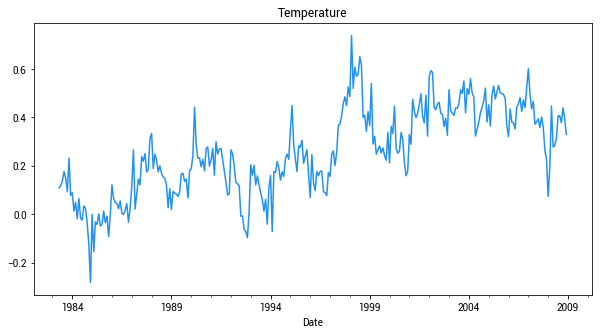

In [48]:
temp_df['Temp'].plot(color = col[2], figsize = (10,5))
plt.title('Temperature')

In [55]:
model = sm.OLS(temp_df['Temp'], sm.add_constant(temp_df.iloc[:,9:])).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Temp   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                 -0.022
Method:                 Least Squares   F-statistic:                    0.4081
Date:                Sat, 13 Oct 2018   Prob (F-statistic):              0.952
Time:                        05:23:03   Log-Likelihood:                 95.505
No. Observations:                 308   AIC:                            -167.0
Df Residuals:                     296   BIC:                            -122.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2373      0.010     24.917      0.000       0.219       0.256
1              0.0312      0.035      0.900      0.369      -0.037       0.099
2              0.0536      0.035      1.549      0.123      -0.015       0.122
3              0.0491      0.035      1.418      0.157      -0.019       0.117
4              0.0308      0.035      0.888      0.375      -0.037       0.099
5              0.0067      0.034      0.198      0.844      -0.060       0.074
6              0.0191      0.034      0.560      0.576      -0.048       0.086
7              0.0279      0.034      0.819      0.413      -0.039       0.095
8              0.0371      0.034      1.092      0.276      -0.030       0.104
9              0.0072      0.034      0.211      0.833      -0.060       0.074
10             0.0073      0.034      0.216      0.829      -0.060       0.074
11            -0.0199      0.034     -0.585      0.559      -0.087       0.047
12            -0.0128      0.034     -0.377      0.707      -0.080       0.054
==============================================================================
Omnibus:                       15.585   Durbin-Watson:                   0.212
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                6.678
Skew:                          -0.033   Prob(JB):                       0.0355
Kurtosis:                       2.282   Cond. No.                     4.09e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is  2e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [19]:
harmon= pd.read_csv('https://raw.githubusercontent.com/magtanggol03/dec130/master/datasets/Harmon.csv').iloc[:, :4]
harmon.Month = pd.to_datetime(harmon.Month)
harmon = harmon.set_index('Month')

Text(0.5,1,'Cases Shipped per Month')

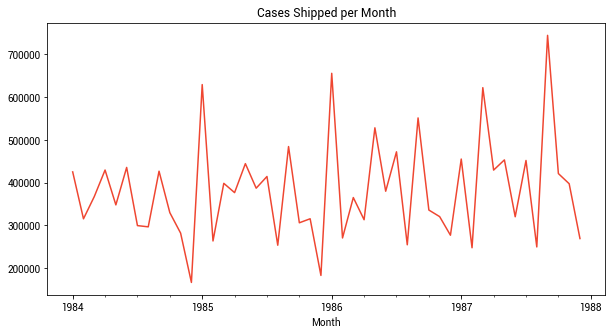

In [24]:
harmon['Caseship'].plot(color = col[0], figsize = (10,5))
plt.title('Cases Shipped per Month')